In [1]:
import numpy as np
import pandas as pd
import sklearn

In [56]:
data_titanic = pd.read_csv('./titanic.csv')
data_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Learnings & Features

### General Assumptions
> **Survived:** Does 1 mean True and 0 False? From here on, this theory is the standard even for my upcoming model.
> **Missing Data:** Some passengers do not have a Cabin listed. Probably not possible to retrieve that information.

### Possible Features for the Model

* **Passenger ID:** Not Important.
* **Survived:** Needed to calculate (Target Variable).
* **Pclass:** Could be a pattern of where people were stationed during the tragedy.
* **Names:** Not Important.
* **Sex:**
    * *Biological factor:* Can men swim longer due to biological standards like more adrenaline and testosterone?
    * *Cultural factor:* Back in that time it was unlikely for women to swim (it was not "ladylike" to be good at sports).
    * *Priority:* "Women and Children" were prioritized to save.
* **Age:** Older people are more likely to die in the ice-water than younger/healthier ones. Younger people often have better stamina.
* **Parch:** Not Important.
* **Ticket:** Not sure yet.
    * *Pro:* Could say something about the place the person was while the ship sunk.
    * *Contra:* Persons can move around freely at any time; the cabin number is better for that occasion.
* **Fare:** Tells us the different Classes, and with it, the places people stayed.
* **Cabin:** Titanic sunk in the night while most people were in their cabins, so that has a huge impact on the security problem/survival chance.
* **Embarked:** Tells us where passengers entered. Could be an indirect pattern of where they were, but less convincing.

---
**Thought:** Maybe I need to give different features a different amount of weight for the calculation.

**Just Playing arround with Plotnine to get an overview of my Data & to learn Plotnine!**

In [72]:
import plotnine as p9

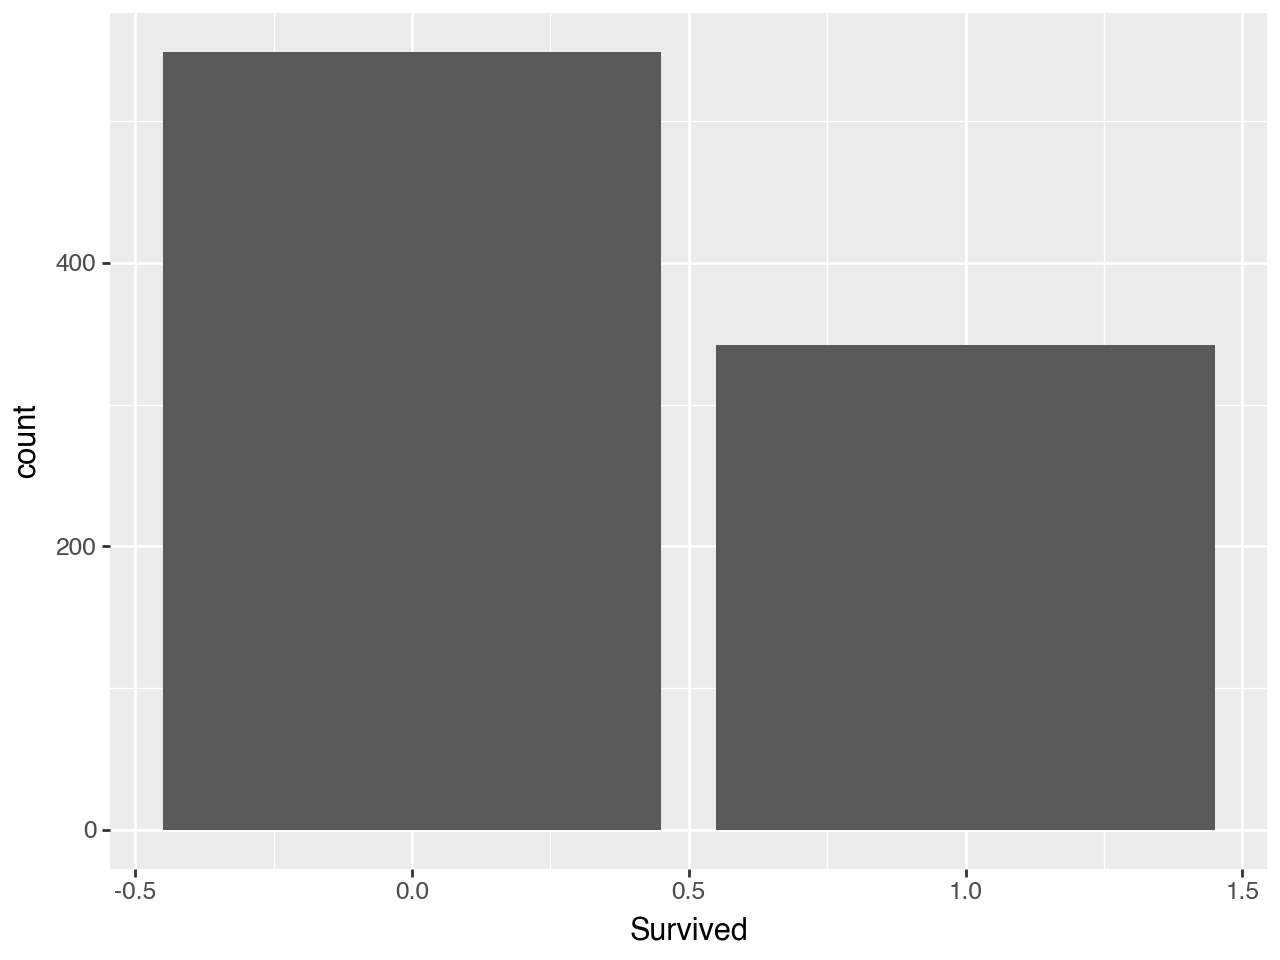

In [144]:
p9.ggplot(data_titanic, p9.aes(x= 'Survived', fill= 'Survived')) + \
    p9.geom_bar()

/Users/timkiefer/miniforge3/envs/ppp/lib/python3.14/site-packages/plotnine/layer.py:293: PlotnineWarning: stat_ydensity : Removed 177 rows containing non-finite values.


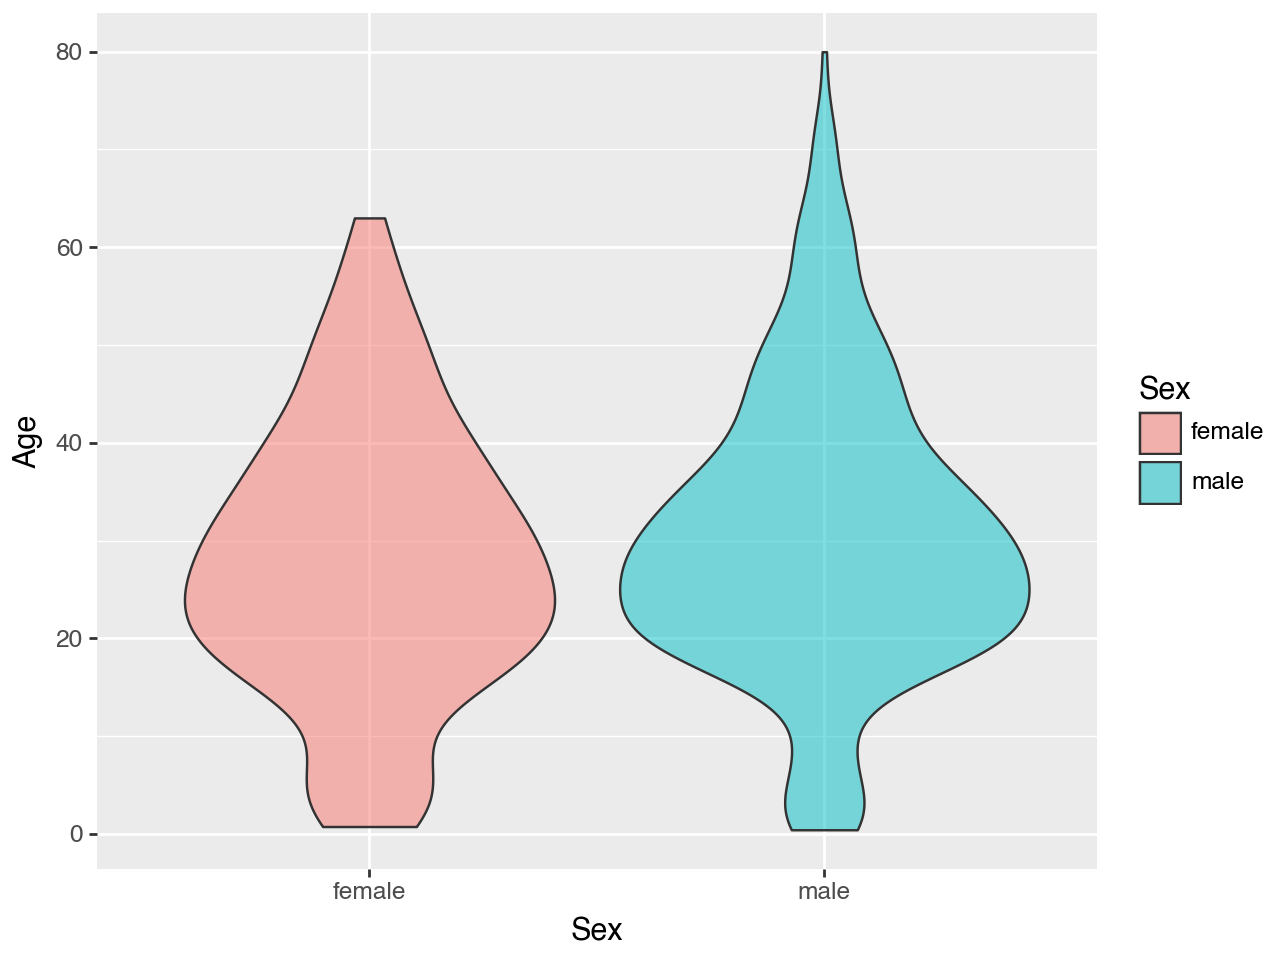

In [178]:
p9.ggplot(data_titanic, p9.aes(x='Sex', y='Age', fill='Sex')) + \
    p9.geom_violin(alpha=0.5)


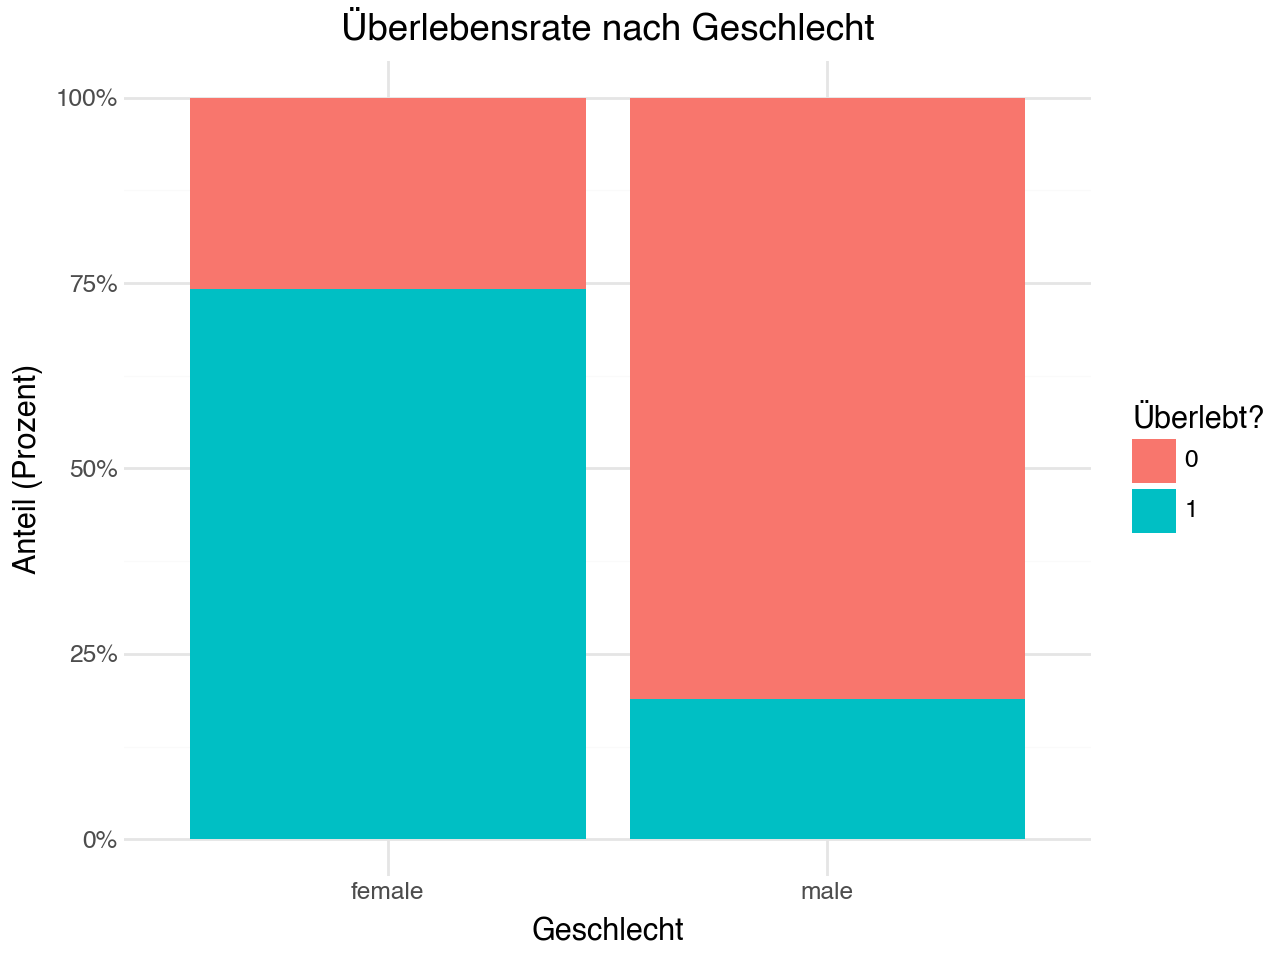

In [181]:

p9.ggplot(data_titanic, p9.aes(x='Sex', fill='factor(Survived)')) + \
    p9.geom_bar(position="fill") + \
    p9.labs(title="Überlebensrate nach Geschlecht", y="Anteil (Prozent)", x="Geschlecht", fill="Überlebt?") + \
    p9.scale_y_continuous(labels=lambda l: ["{:.0f}%".format(v * 100) for v in l]) + \
    p9.theme_minimal()



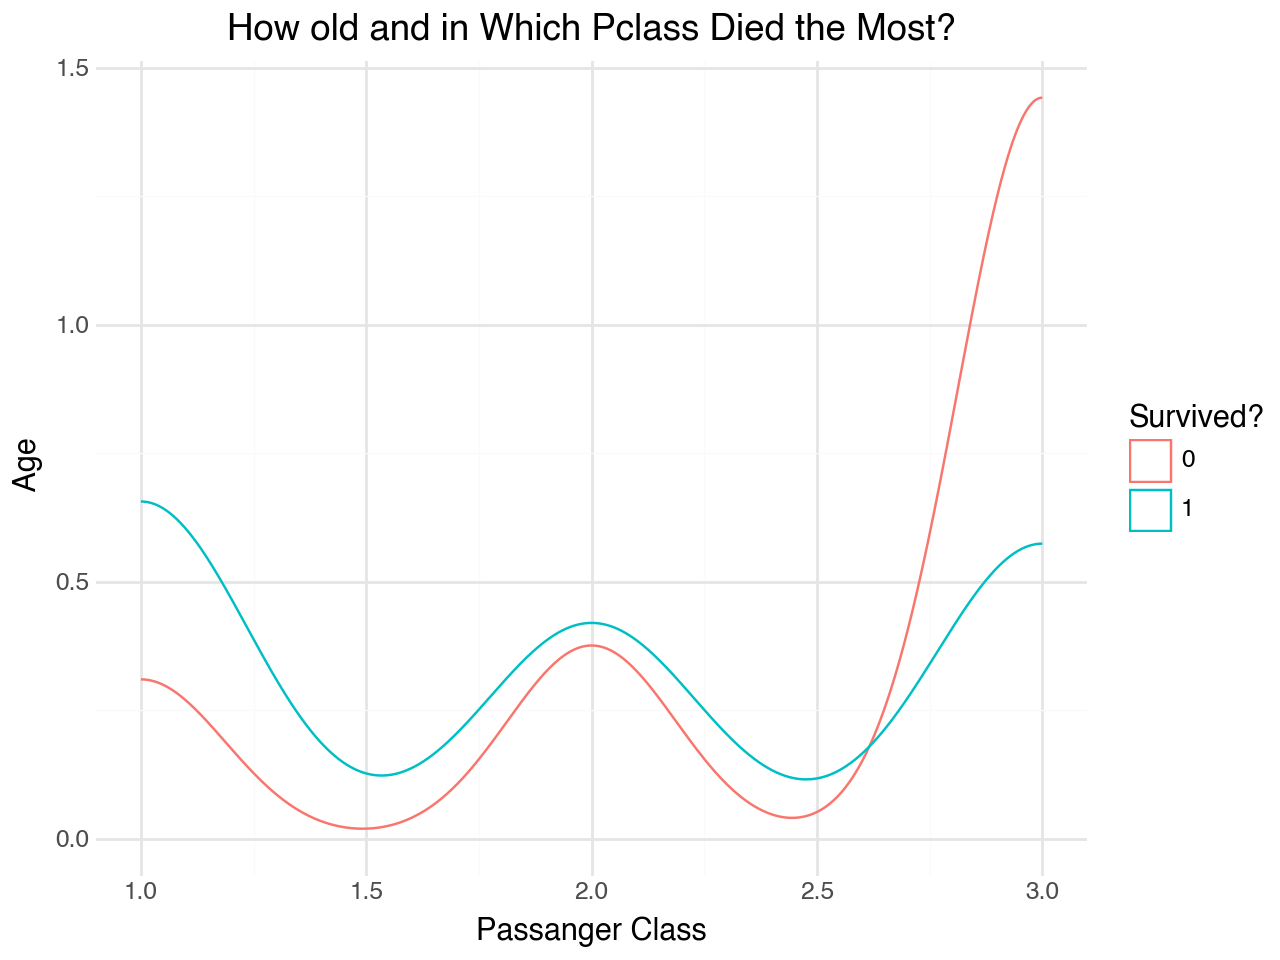

In [ ]:
# Zeigt leider nur an wie das alter verteilt ist auf die verschiedenen gruppen sagt wenig über die survived range aus

p9.ggplot(data_titanic) + \
    p9.aes(x='Pclass', y='Age', color= 'factor(Survived)') + \
    p9.geom_density() + \
    p9.labs(title = 'How old and in Which Pclass Died the Most?',
            x = 'Passanger Class',
            y =' Age',
            color='Survived?') + \
    p9.theme_minimal()

/Users/timkiefer/miniforge3/envs/ppp/lib/python3.14/site-packages/plotnine/layer.py:293: PlotnineWarning: stat_bin : Removed 177 rows containing non-finite values.


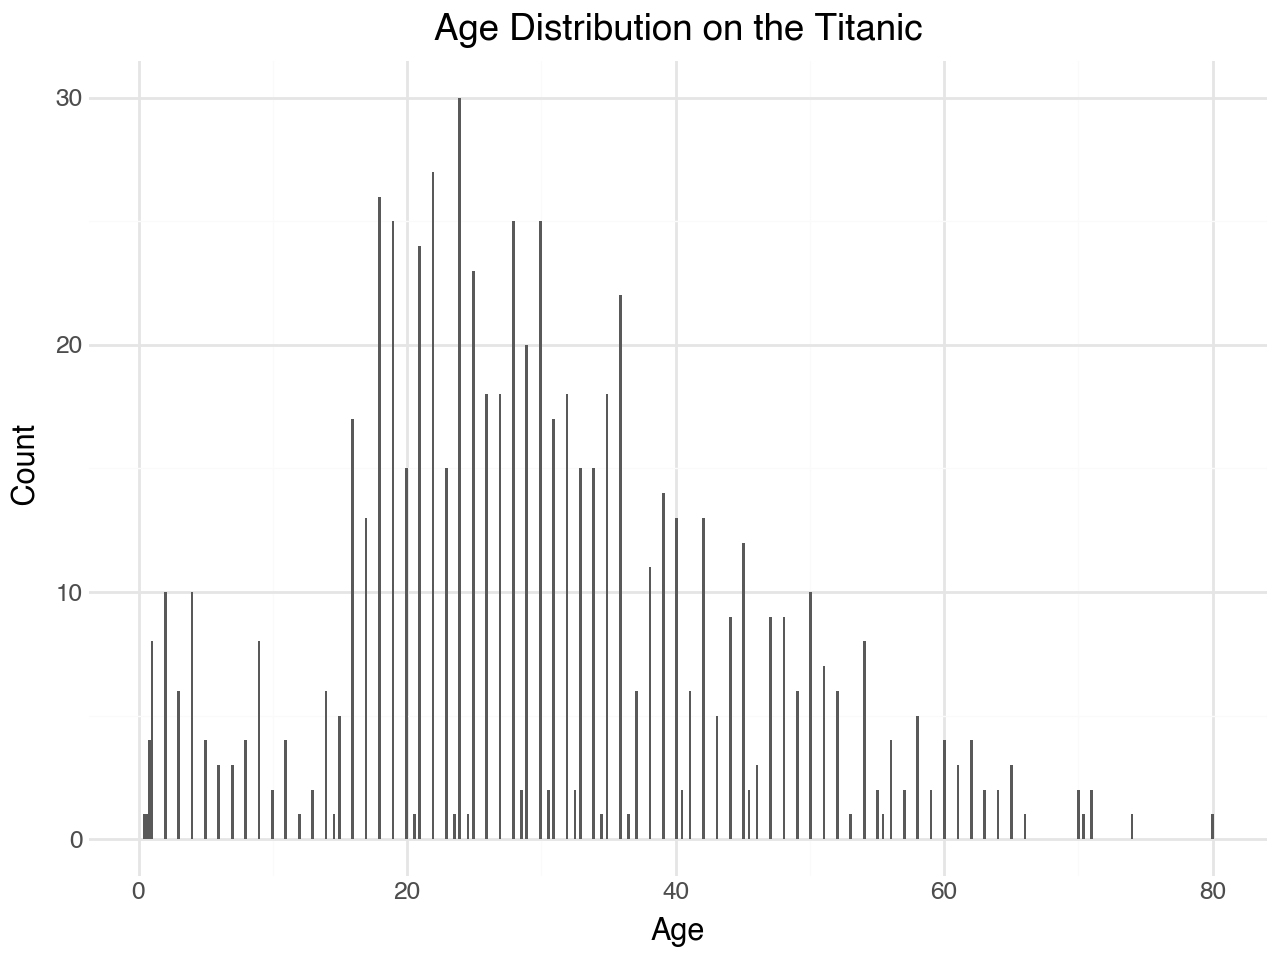

In [121]:

p9.ggplot(data_titanic, p9.aes(x='Age')) + \
        p9.geom_histogram(bins = 400) + \
        p9.labs(title = 'Age Distribution on the Titanic',
                x = 'Age',
                y =' Count') + \
        p9.theme_minimal()


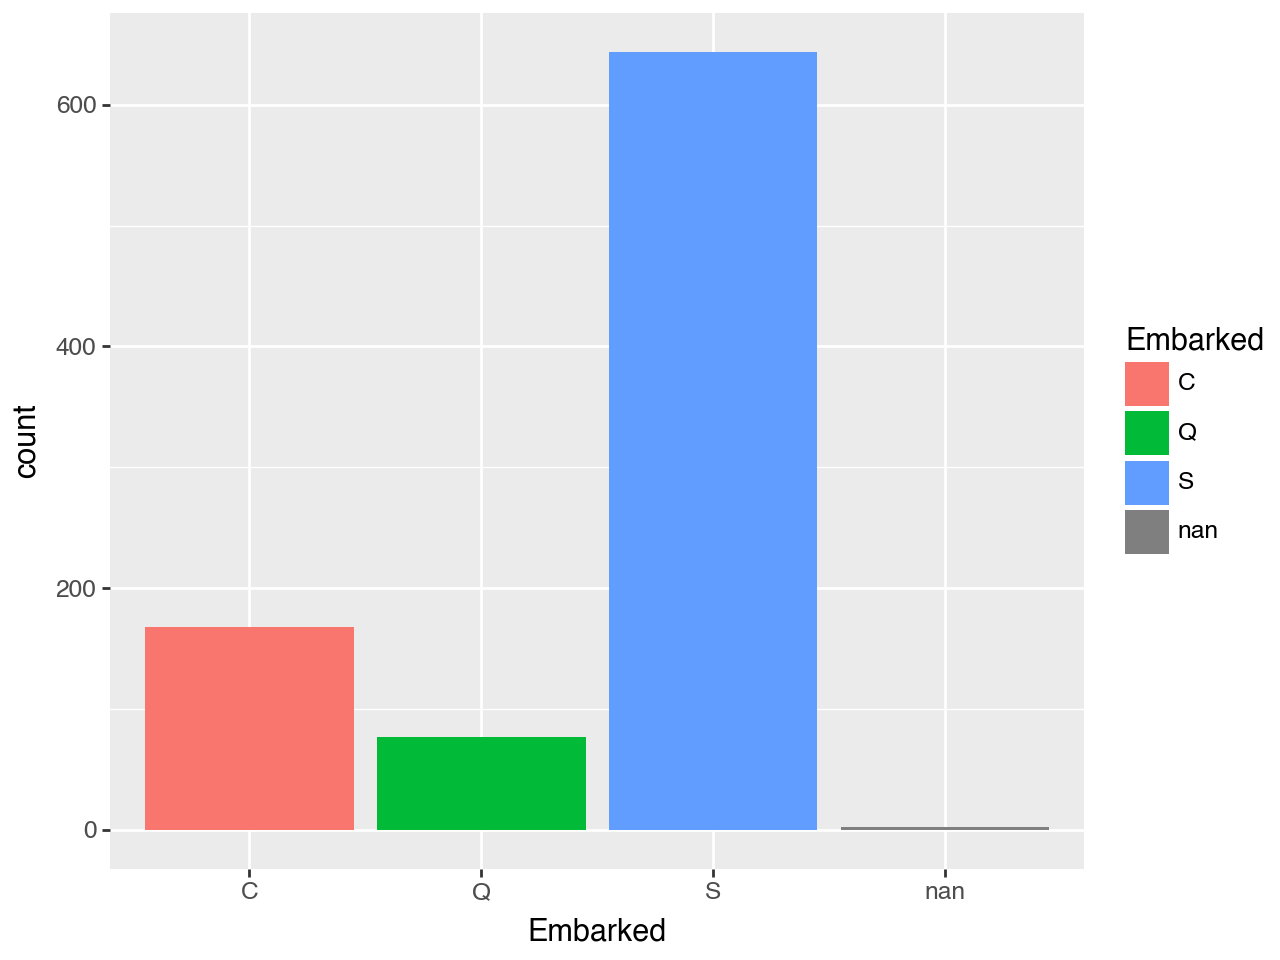

In [141]:
p9.ggplot(data_titanic, p9.aes(x= 'Embarked', fill= 'Embarked')) + \
    p9.geom_bar()

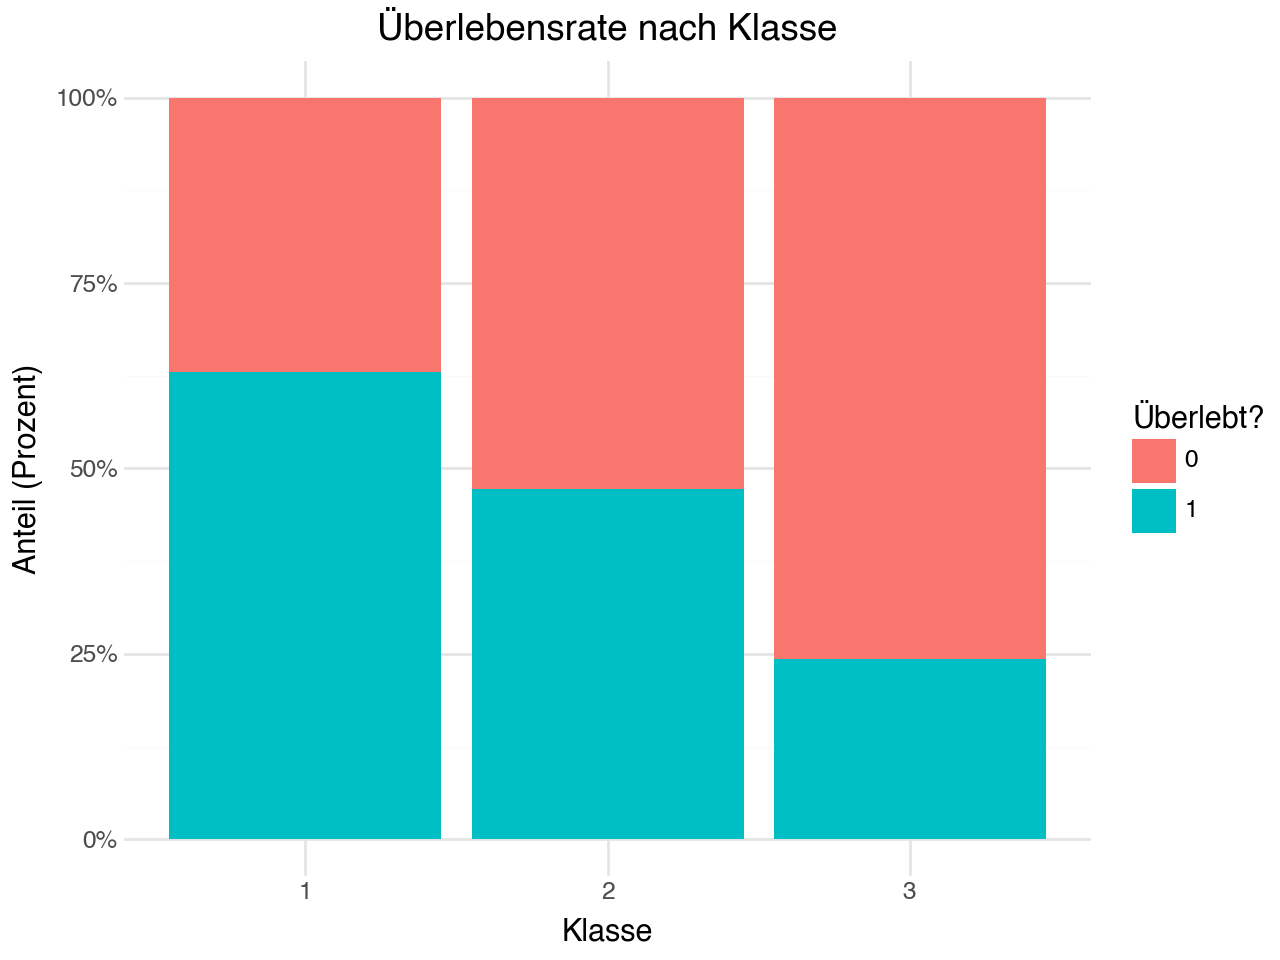

In [ ]:

p9.ggplot(data_titanic, p9.aes(x='factor(Pclass)', fill='factor(Survived)')) + \
    p9.geom_bar(position="fill") + \
    p9.labs(title="Überlebensrate nach Klasse", y="Anteil (Prozent)", x="Klasse", fill="Überlebt?") + \
    p9.scale_y_continuous(labels=lambda l: ["{:.0f}%".format(v * 100) for v in l]) + \
    p9.theme_minimal()

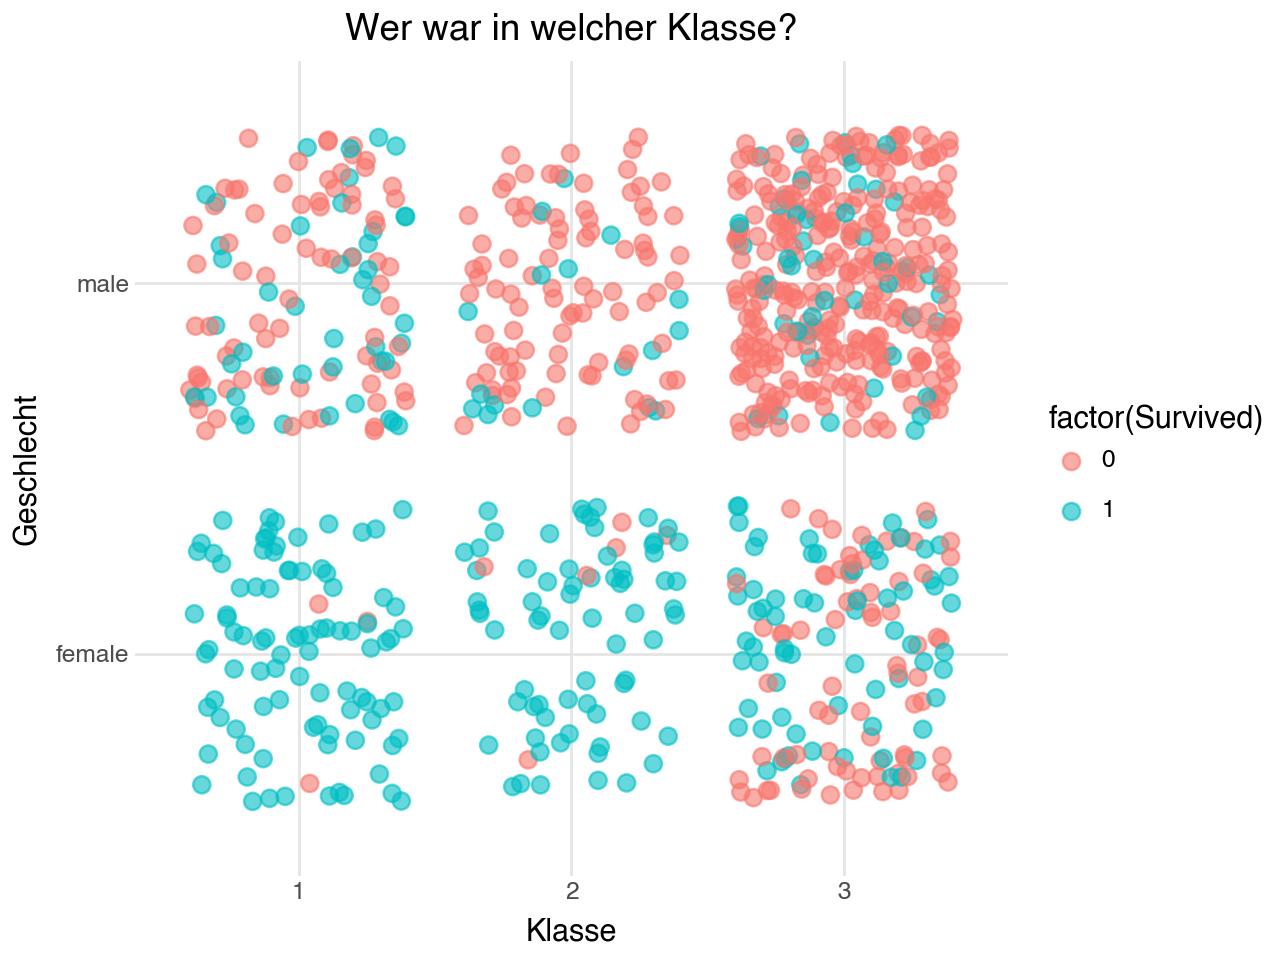

In [182]:
# Idea: Is there the Pclass 1 just luckyer from their position or is it because they are younger and / or more women?

p9.ggplot(data_titanic, p9.aes(x='factor(Pclass)', y='Sex', color='factor(Survived)')) + \
    p9.geom_jitter(size=3, alpha=0.6) + \
    p9.labs(title="Wer war in welcher Klasse?", x="Klasse", y="Geschlecht") + \
    p9.theme_minimal()



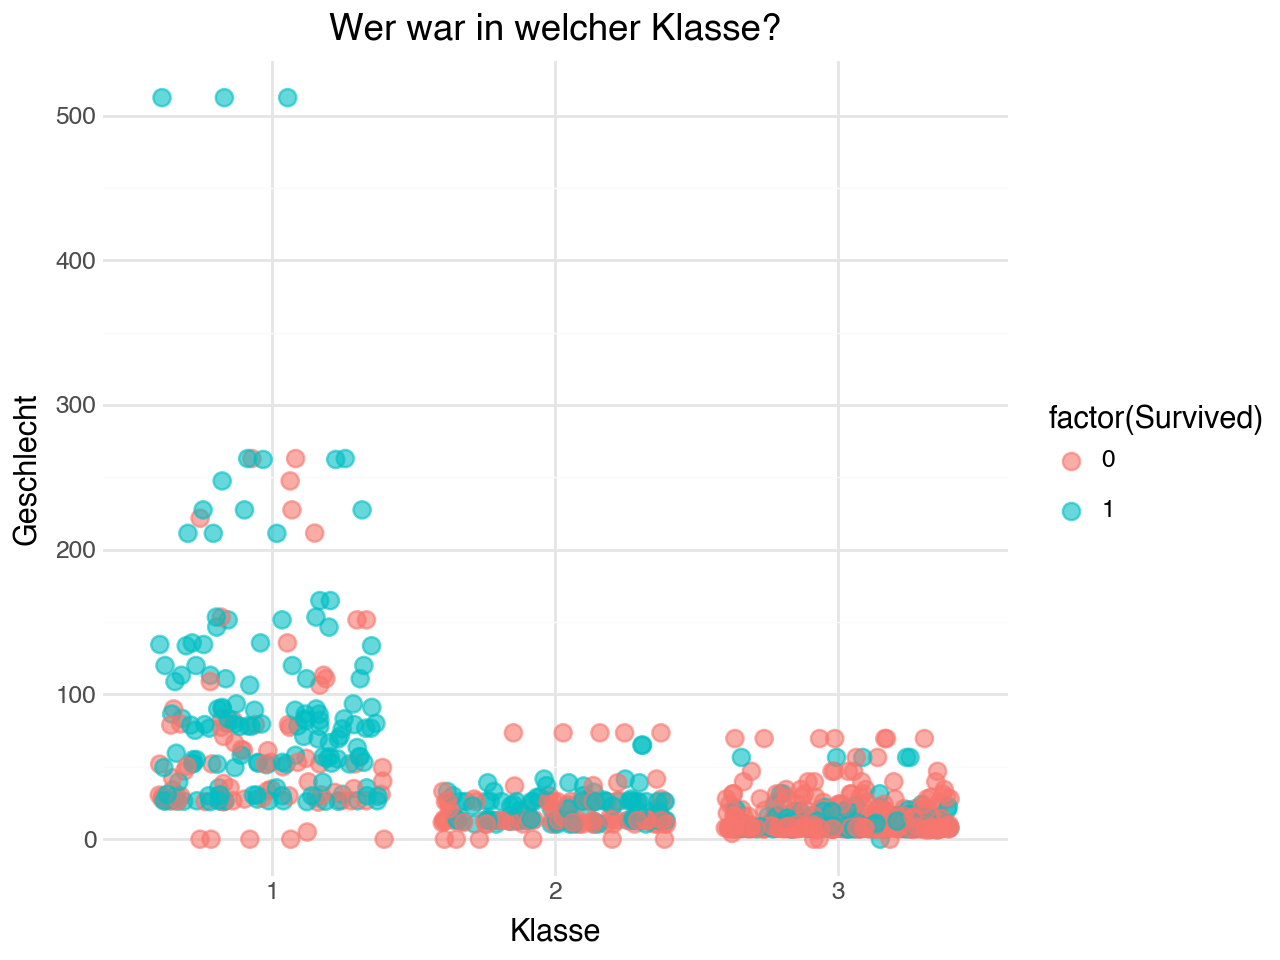

In [ ]:
p9.ggplot(data_titanic, p9.aes(x='factor(Pclass)', y='Fare', color='factor(Survived)')) + \
    p9.geom_jitter(size=3, alpha=0.6) + \
    p9.labs(title="Wer war in welcher Klasse?", x="Klasse", y="Fare") + \
    p9.theme_minimal()

# Fazit: Pclass 1 is the more likey to be rich ... was beeing rich a privilige in a Livesaving-situation?

/Users/timkiefer/miniforge3/envs/ppp/lib/python3.14/site-packages/plotnine/layer.py:374: PlotnineWarning: geom_point : Removed 177 rows containing missing values.


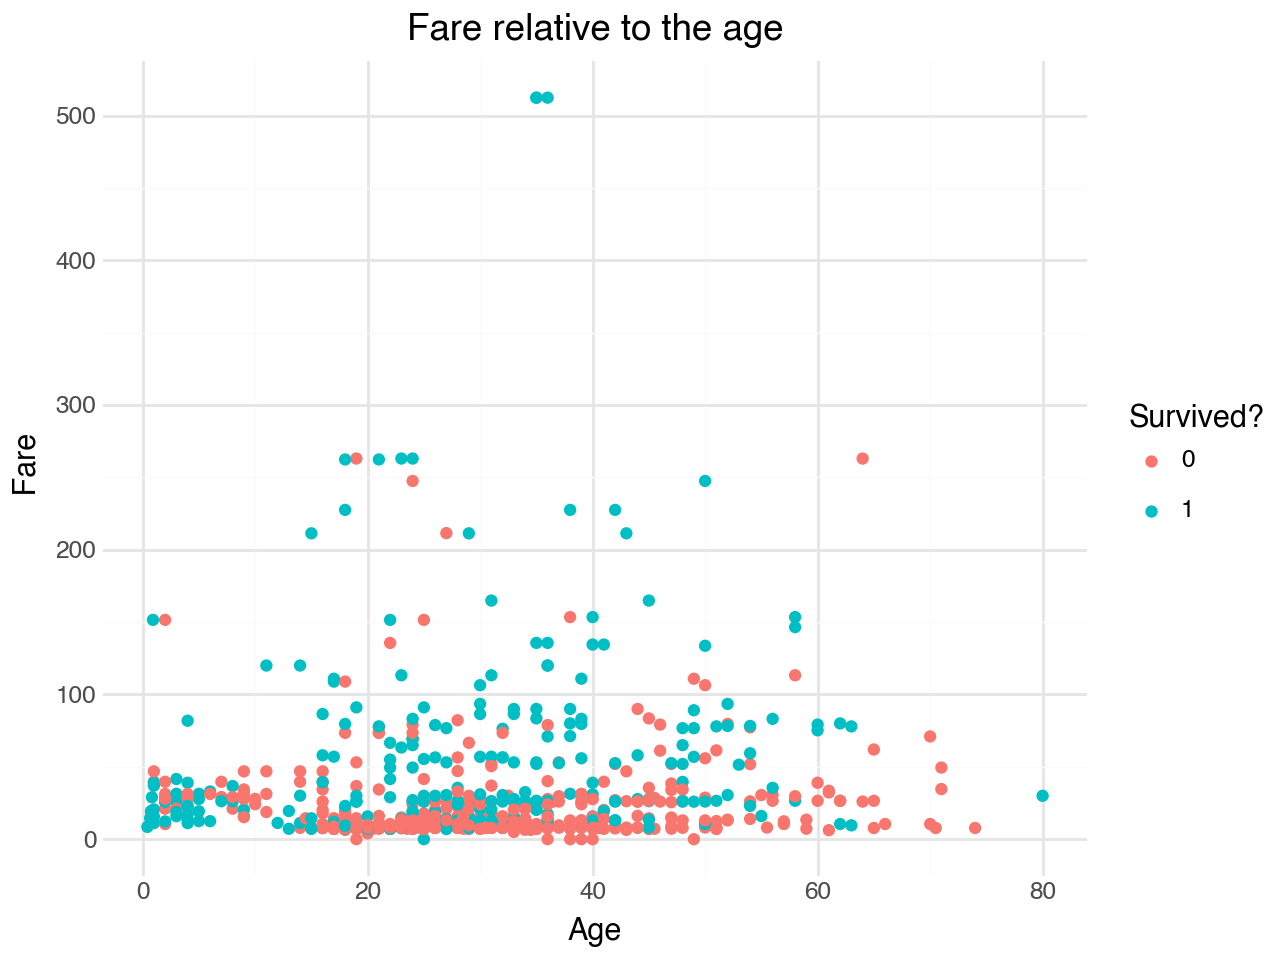

In [86]:
p9.ggplot(data_titanic) + \
    p9.aes(x='Age', y='Fare', color= 'factor(Survived)') + \
    p9.geom_point() + \
    p9.labs(title = 'Fare relative to the age',
            x = 'Age',
            y =' Fare',
            color='Survived?') + \
    p9.theme_minimal()

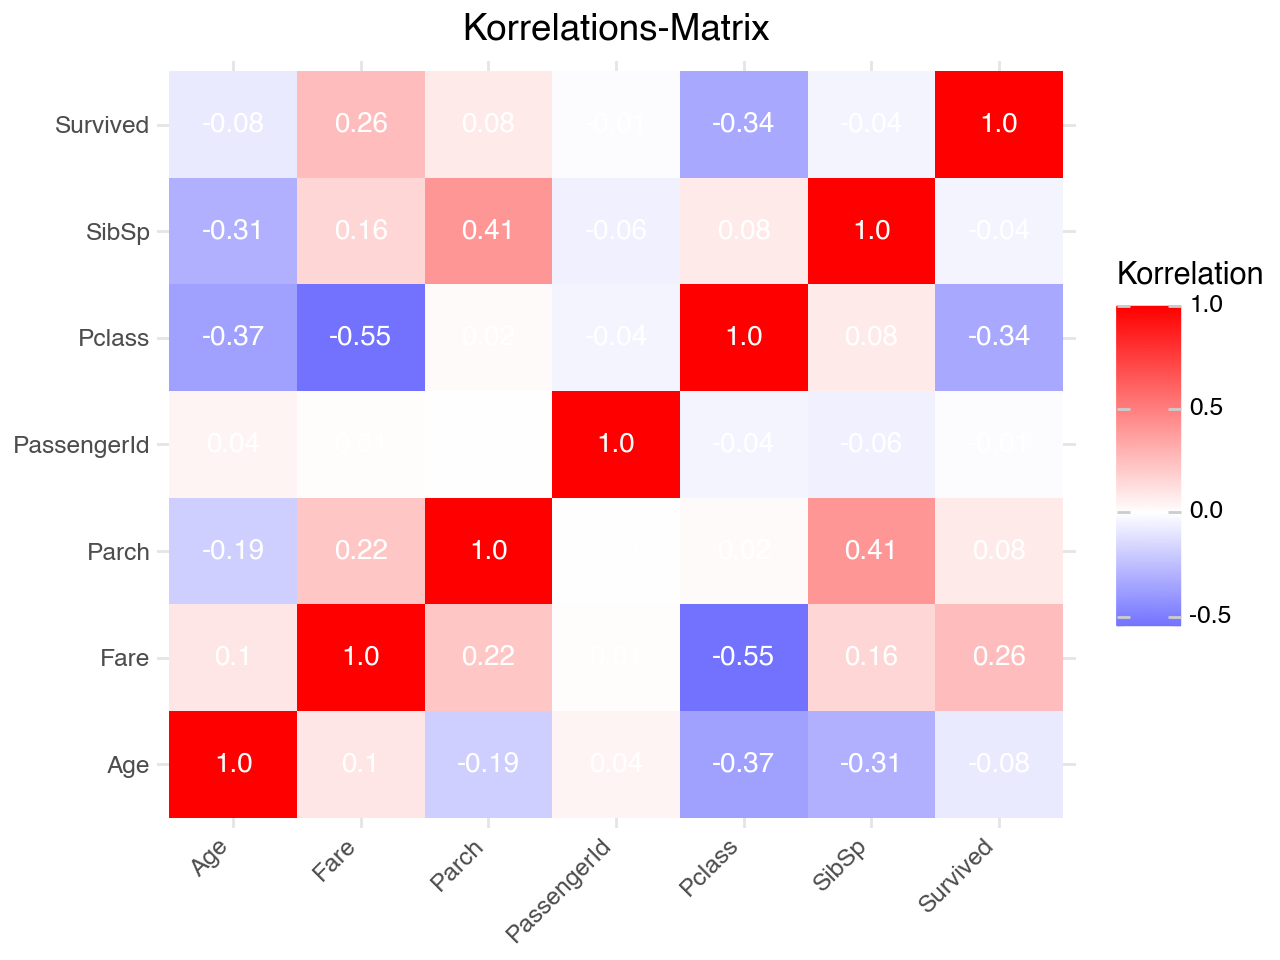

In [177]:
# Nur numerische Spalten auswählen für Korrelation
numeric_df = data_titanic.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr().round(2).reset_index()

# Daten "schmelzen" (umformen), damit plotnine sie versteht
corr_melted = pd.melt(corr_matrix, id_vars='index')

# Die Heatmap

p9.ggplot(corr_melted, p9.aes(x='index', y='variable', fill='value')) + \
    p9.geom_tile() + \
    p9.geom_text(p9.aes(label='value'), size=10, color="white") + \
    p9.scale_fill_gradient2(low="blue", mid="white", high="red", midpoint=0) + \
    p9.labs(title="Korrelations-Matrix", x="", y="", fill="Korrelation") + \
    p9.theme_minimal() +\
    p9.theme(axis_text_x=p9.element_text(rotation=45, hjust=1))


# Analysis Conclusion

### General Observations
> **Data Reality:** The "Women and Children first" rule is not just a myth, it is clearly visible in the data.
> **Money Factor:** Wealth seems to buy security. The correlation between Price and Survival is undeniable.

### Feature Analysis based on Visuals

* **Age:**
    * *Problem:* Still has many **Missing Data** entries.
    * *Observation:* Children had a higher priority. Younger people generally survived more often.
    * *To Do?:* Do I need to fill the gaps (Imputation) before feeding this into the model?
* **Sex:**
    * *Impact:* Massive. Being female was the best insurance on that night.
    * *Cultural factor:* The crew likely enforced the evacuation protocol strictly favoring women (and children, but no data to them)
* **Pclass:**
    * *Pattern:* 1st Class passengers survived way more than 3rd Class.
    * *Reason:* Probably better access to the deck/lifeboats compared to 3rd Class cabins deep inside the ship.
* **Fare:**
    * *Correlation:* Confirms the Pclass pattern. Higher Fare -> Better Survival Chance.
* **Cabin:**
    * *Status:* Still mostly empty. Probably not possible to use effectively without heavy engineering.

---
**Thought:** The model should heavily weight **Sex** and **Pclass**. **Age** is important but needs cleaning first. **Fare** is basically a proxy for Class, so maybe I don't need both? But... 